In [176]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import QasmSimulator
import qiskit_aer
import qiskit_aer.primitives
from qiskit_aer.primitives import SamplerV2
from qiskit_aer.primitives import EstimatorV2
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector

sim = AerSimulator()

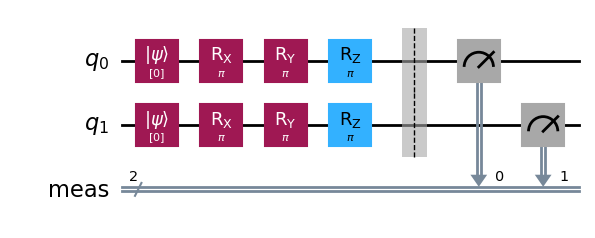

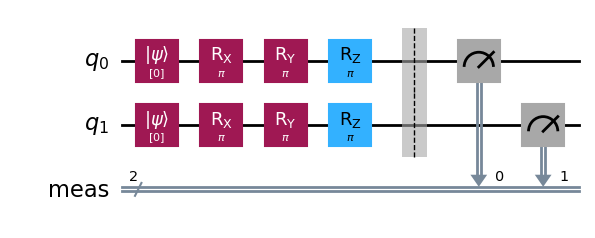

In [140]:
theta=np.pi
#print (a*np.pi/4)
qc=QuantumCircuit(2,0)
qc.initialize(0,0)
qc.initialize(0,1)
#qc.initialize(2) 
qc.rx(theta,0)
qc.ry(theta,0)
qc.rz(theta,0)
qc.rx(theta,1)
qc.ry(theta,1)
qc.rz(theta,1)
qc.measure_all()
qc.draw('mpl')

In [169]:
dat=[]
for i in range(0,21):#21):
    theta=i*0.1*np.pi
    #print (a*np.pi/4)
    qc=QuantumCircuit(2,0)
    qc.initialize(0,0)
    qc.initialize(0,0)
    #qc.initialize(2) 
    qc.rx(theta,0)
    qc.ry(theta,0)
    qc.rz(theta,0)
    qc.rx(theta,1)
    qc.ry(theta,1)
    qc.rz(theta,1)
    qc.measure_all()
    qc.save_statevector()
    pqc = transpile(qc, sim, optimization_level=0)
    sim_statevector = AerSimulator(method='statevector')
    job_statevector = sim_statevector.run(qc, shots=shots)
    counts_statevector = job_statevector.result().get_statevector()
    dat.append((theta,counts_statevector[0],counts_statevector[1],counts_statevector[2],counts_statevector[3]))
    #print(theta,counts_statevector[0],counts_statevector[1],counts_statevector[2],counts_statevector[3])
    print(theta,counts_statevector[1],counts_statevector[3])

#qc.draw('mpl')


0.0 0j 0j
0.3141592653589793 0j 0j
0.6283185307179586 0j 0j
0.942477796076938 0j (0.8090169943749475-0.5877852522924732j)
1.2566370614359172 (0.9554225632202383-0.29524180884432616j) 0j
1.5707963267948966 0j (1+0j)
1.884955592153876 0j 0j
2.199114857512855 0j (0.8090169943749475+0.5877852522924732j)
2.5132741228718345 0j 0j
2.827433388230814 0j 0j
3.141592653589793 0j 0j
3.455751918948773 0j (-0+0j)
3.769911184307752 0j (-0+0j)
4.084070449666731 0j (-0+0j)
4.39822971502571 0j (-0+0j)
4.71238898038469 (-1-2.220446049250313e-16j) (-0+0j)
5.026548245743669 (-0+0j) 0j
5.340707511102649 (-0+0j) 0j
5.654866776461628 (-0.777437524821136+0.6289601696450939j) -0j
5.969026041820607 (-0+0j) 0j
6.283185307179586 (-0+0j) 0j


In [171]:
print(theta,counts_statevector[0])

6.283185307179586 (1+2.449293598294707e-16j)


In [182]:
print(dat[0][1])

(1+0j)


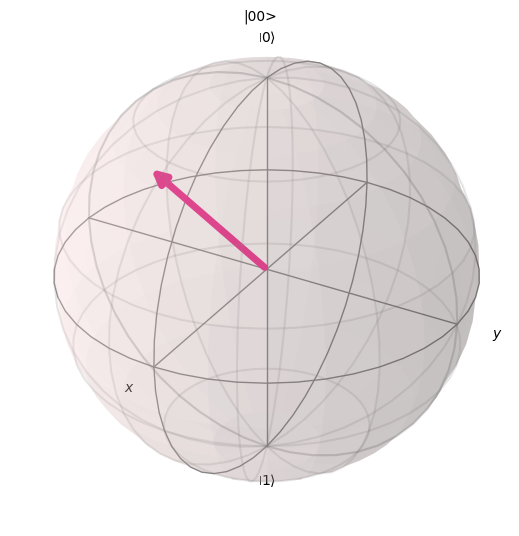

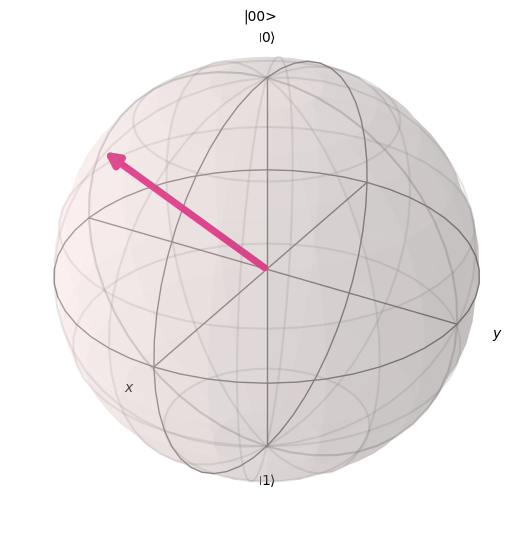

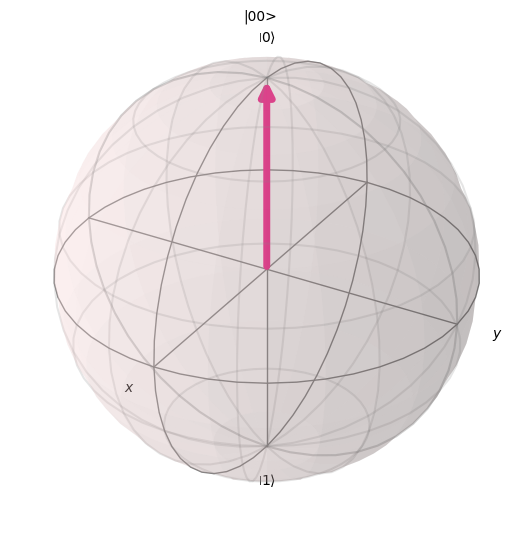

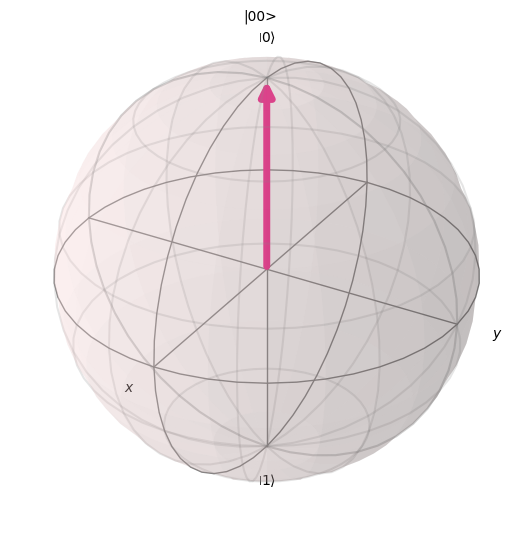

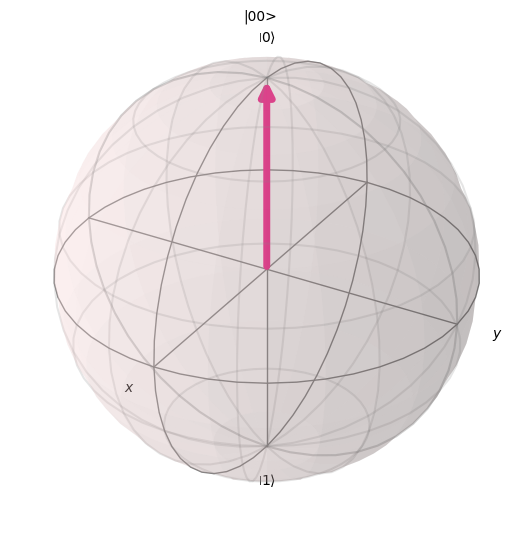

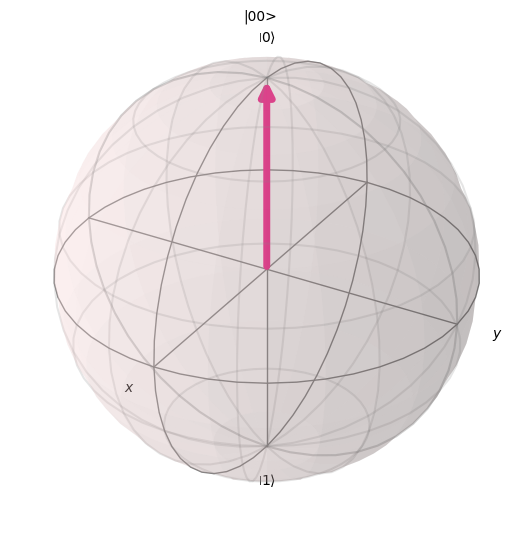

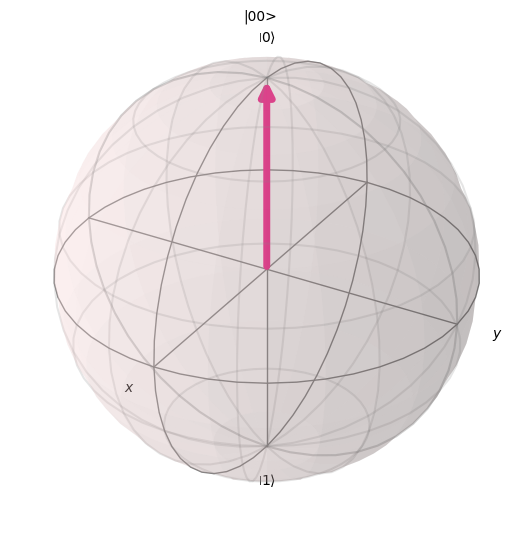

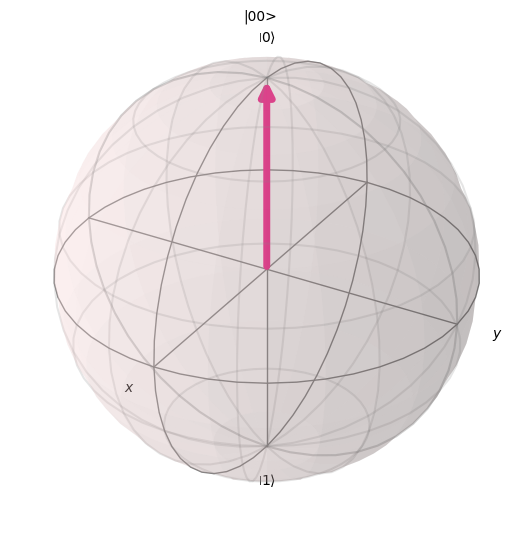

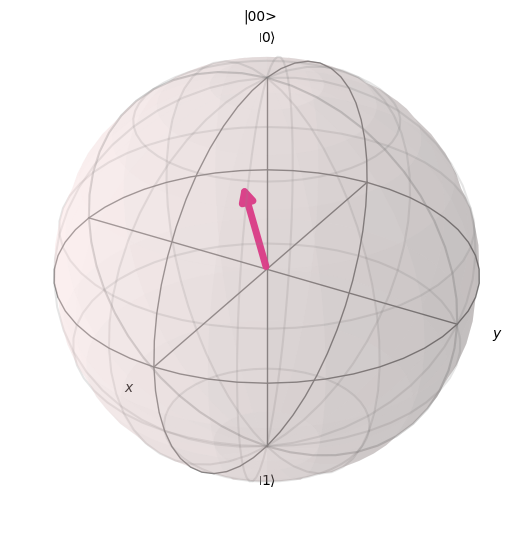

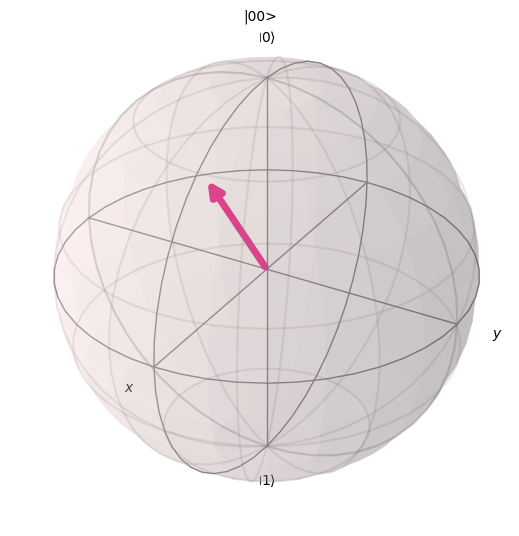

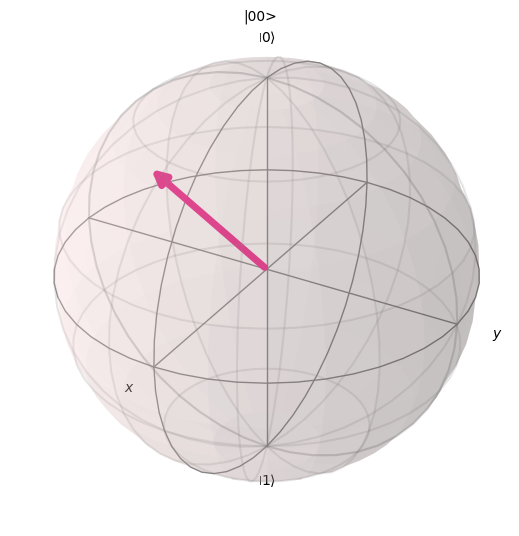

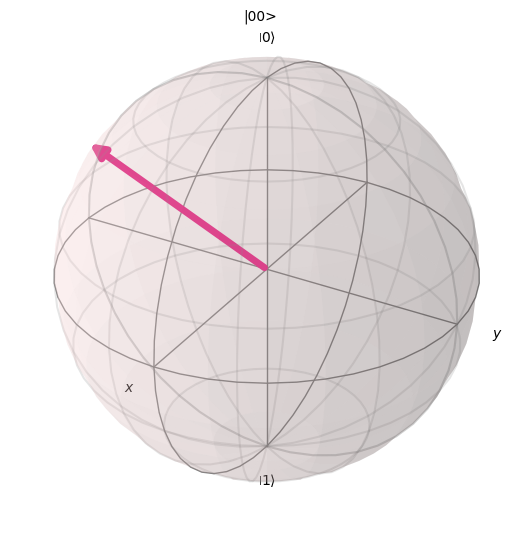

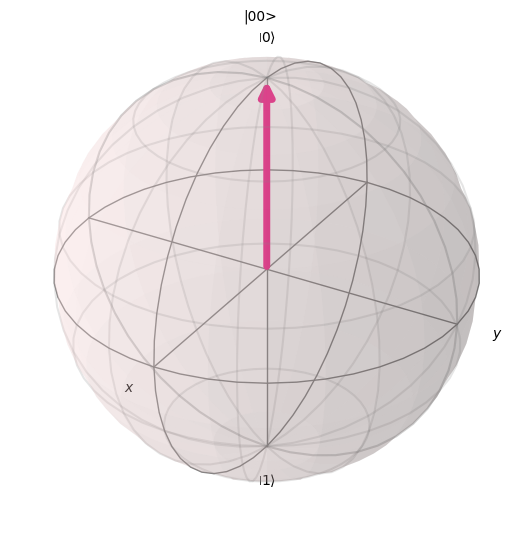

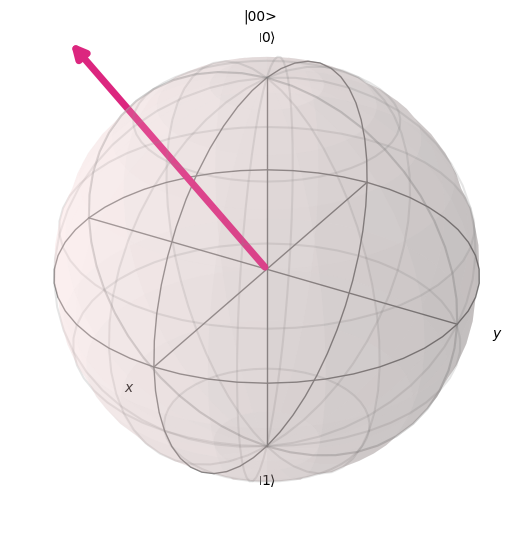

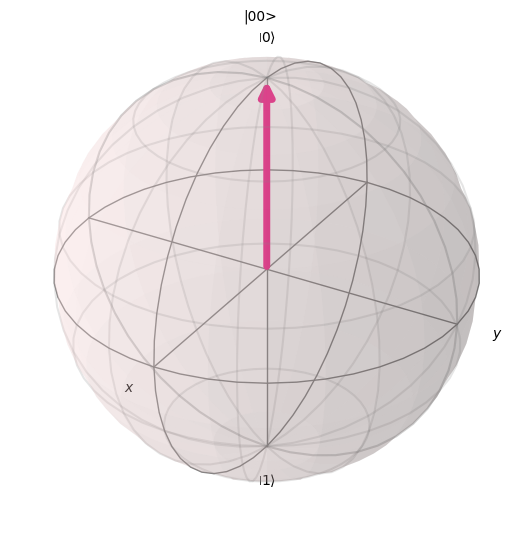

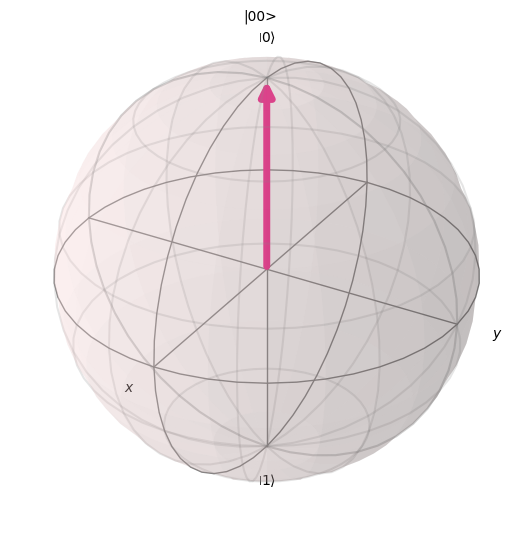

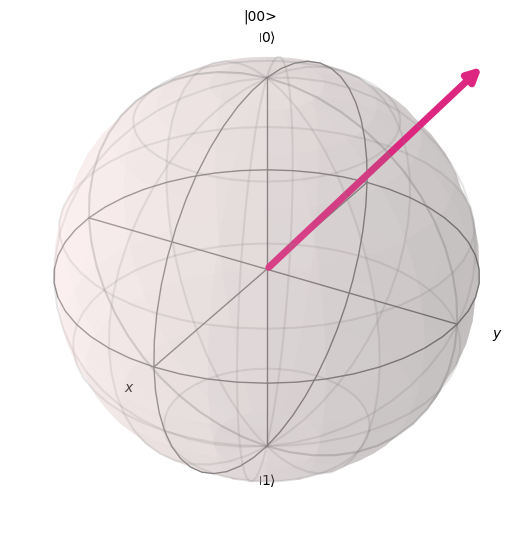

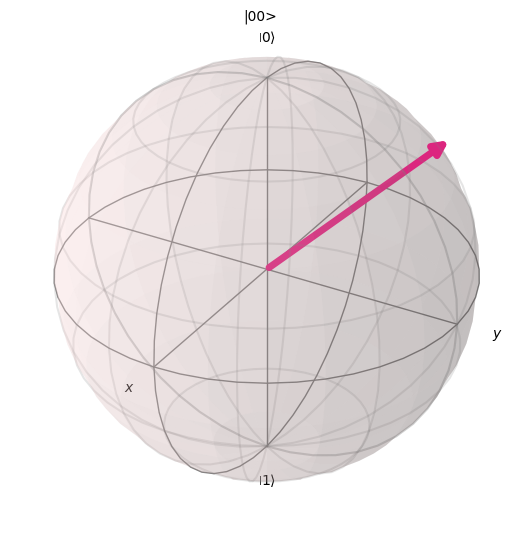

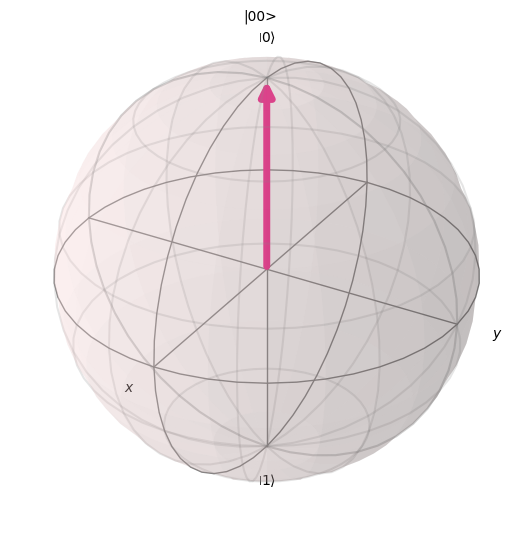

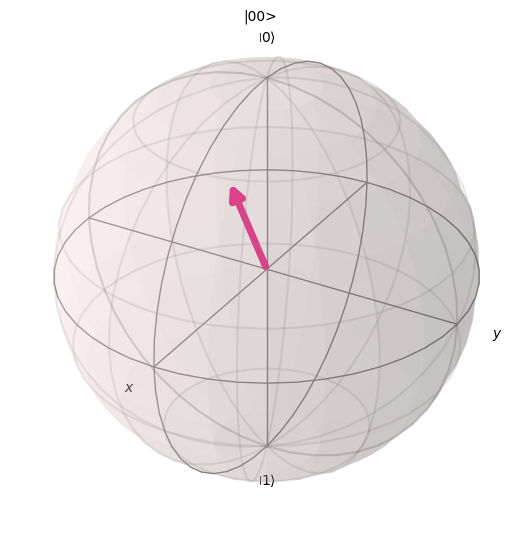

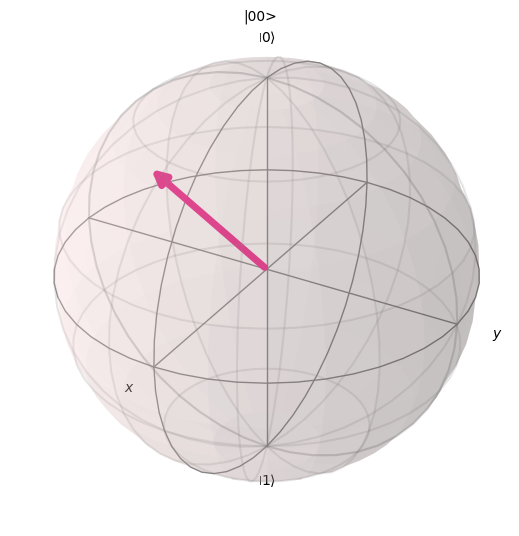

In [192]:

for i in range(0,len(dat)):
    vector=dat[i][1]
    #print(vector)
    plot_bloch_vector([vector.real,vector.imag,1], title="|00>")